In [28]:
#Зчитати датасет ВВП (млн. дол. США) за країнами з Вікіпедії.
import pandas as pd
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
tables = pd.read_html(url)
df = tables[2]

In [29]:
#Вивести перших 5 рядків
df.head()

Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022

In [30]:
#Визначити розмір датасета
df.shape

(210, 7)

In [31]:
#Визначити оптимальну кількість стовпців
df.columns

MultiIndex([( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][13]',          'Forecast'),
            (        'IMF[1][13]',              'Year'),
            (    'World Bank[14]',          'Estimate'),
            (    'World Bank[14]',              'Year'),
            ('United Nations[15]',          'Estimate'),
            ('United Nations[15]',              'Year')],
           )

In [32]:
#Змінити назви стовпців на більш зручні
new_columns = [
    'Country',
    'IMF_Forecast',
    'IMF_Year',
    'WorldBank_Estimate',
    'WorldBank_Year',
    'UN_Estimate',
    'UN_Year'
]
df.columns = new_columns
selected_columns = {
    'IMF_Forecast' : 'MVF_2024',
    'WorldBank_Estimate' : 'WorldBank_2023',
    'UN_Estimate' : 'OON_2022'
}
df1 = df[['Country'] + list(selected_columns.keys())]
df = df1.rename(columns=selected_columns)
df.head()

,Country,MVF_2024,WorldBank_2023,OON_2022
0,World,109529216,105435540,100834796
1,United States,28781083,27360935,25744100
2,China,18532633,17794782,17963170
3,Germany,4591100,4456081,4076923
4,Japan,4110452,4212945,4232173


In [33]:
#Визначити тип даних
df.dtypes

,0
Country,object
MVF_2024,object
WorldBank_2023,object
OON_2022,object


In [34]:
#Замініть у таблиці значення "-" на значення NaN. Перевірити наявність пропущених значень.
df.replace('-', float('NaN'), inplace=True)
df['MVF_2024'] = pd.to_numeric(df['MVF_2024'], errors='coerce')
df['WorldBank_2023'] = pd.to_numeric(df['WorldBank_2023'], errors='coerce')
df['OON_2022'] = pd.to_numeric(df['OON_2022'], errors='coerce')
df.dtypes
df.isnull().sum()

,0
Country,0
MVF_2024,15
WorldBank_2023,8
OON_2022,1


In [35]:
#При наявності, замінити пропущені значення на середнє значення. Ще раз перевірити наявність пропущених значень.
df = df.fillna(df.mean(numeric_only=True), axis=0)
df.isnull().sum()

,0
Country,0
MVF_2024,0
WorldBank_2023,0
OON_2022,0


In [38]:
#Перевірити наявність дублікатів. При наявності видалити дублікати.
duplicates = df.duplicated()
df_cleaned = df.drop_duplicates()
duplicates.sum()

0

In [40]:
#Вивести описову статистику датасету describe().
df.describe()

,MVF_2024,WorldBank_2023,OON_2022
count,2.100000e+02,2.100000e+02,2.100000e+02
mean,1.123228e+06,1.037206e+06,9.612699e+05
std,7.900707e+06,7.602076e+06,7.275608e+06
min,6.600000e+01,6.200000e+01,5.900000e+01
25%,1.464775e+04,1.044175e+04,8.928250e+03
50%,6.215800e+04,4.341600e+04,3.210250e+04
75%,4.366365e+05,3.376592e+05,2.412485e+05
max,1.095292e+08,1.054355e+08,1.008348e+08


In [61]:
#Визначте відхилення (різницю) між показниками MVF_2024 та WorldBank_2023 для кожної країни. У яких країнах ці показники найбільше відрізняються(дати відповідь)?
df = df[~df['Country'].str.contains("World|European Union|Other", na=False)]
df['Difference'] = (df['MVF_2024'] - df['WorldBank_2023']).abs()
max_difference = df['Difference'].max()
countries_with_max_difference = df[df['Difference'] == max_difference]
print(countries_with_max_difference[['Country', 'MVF_2024', 'WorldBank_2023', 'Difference']])

         Country    MVF_2024  WorldBank_2023  Difference
1  United States  28781083.0      27360935.0   1420148.0


In [50]:
#Обчисліть кореляцію між показниками MVF_2024, WorldBank_2023 та OON_2022. Які пари змінних мають найвищу кореляцію?
correlation_matrix = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].corr()
print(correlation_matrix)

correlation_matrix_unstacked = correlation_matrix.unstack()
correlation_matrix_sorted = correlation_matrix_unstacked.sort_values(ascending=False)

correlation_matrix_filtered = correlation_matrix_sorted[correlation_matrix_sorted < 1]

highest_correlation = correlation_matrix_filtered.idxmax()

print(f"Пара змінних {highest_correlation[0]} і {highest_correlation[1]} з кореляцією {correlation_matrix_filtered.max()}")

                MVF_2024  WorldBank_2023  OON_2022
MVF_2024        1.000000        0.999351  0.999246
WorldBank_2023  0.999351        1.000000  0.999656
OON_2022        0.999246        0.999656  1.000000
Пара змінних WorldBank_2023 і OON_2022 з кореляцією 0.9996558690821391


In [52]:
#Обчисліть середнє значення для кожного стовпця (MVF_2024, WorldBank_2023, OON_2022). Як це середнє значення змінюється між роками?
mean_values = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].mean()

print("Середнє значення для кожного стовпця:")
print(mean_values)

print("\nЗміна середнього значення між роками:")
print(f"Зміна між MVF_2024 і WorldBank_2023: {mean_values['WorldBank_2023'] - mean_values['MVF_2024']}")
print(f"Зміна між WorldBank_2023 і OON_2022: {mean_values['OON_2022'] - mean_values['WorldBank_2023']}")

Середнє значення для кожного стовпця:
MVF_2024          1.123228e+06
WorldBank_2023    1.037206e+06
OON_2022          9.612699e+05
dtype: float64

Зміна середнього значення між роками:
Зміна між MVF_2024 і WorldBank_2023: -86021.51886265562
Зміна між WorldBank_2023 і OON_2022: -75936.31185750151


In [60]:
#Обчисліть стандартне відхилення показників для кожної країни. Яка країна має найвищу варіативність у показниках між роками?
df = df[~df['Country'].str.contains("World|European Union|Other", na=False)]
df['Std_Deviation'] = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].std(axis=1)
country_with_highest_variability = df.loc[df['Std_Deviation'].idxmax()]
country_with_highest_variability[['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022', 'Std_Deviation']]

,1
Country,United States
MVF_2024,28781083.0
WorldBank_2023,27360935.0
OON_2022,25744100.0
Std_Deviation,1519552.648063


In [59]:
#Визначення країни з найвищим та найнижчими показниками: Знайдіть країну з найвищим та найнижчим показниками у кожному з років (MVF_2024, WorldBank_2023, OON_2022).
df = df[~df['Country'].str.contains("World|European Union|Other", na=False)]
max_mvf_2024 = df.loc[df['MVF_2024'].idxmax()]
max_worldbank_2023 = df.loc[df['WorldBank_2023'].idxmax()]
max_oon_2022 = df.loc[df['OON_2022'].idxmax()]

min_mvf_2024 = df.loc[df['MVF_2024'].idxmin()]
min_worldbank_2023 = df.loc[df['WorldBank_2023'].idxmin()]
min_oon_2022 = df.loc[df['OON_2022'].idxmin()]

print("Країни з найвищими показниками:")
print(f"MVF_2024: {max_mvf_2024['Country']} - {max_mvf_2024['MVF_2024']}")
print(f"WorldBank_2023: {max_worldbank_2023['Country']} - {max_worldbank_2023['WorldBank_2023']}")
print(f"OON_2022: {max_oon_2022['Country']} - {max_oon_2022['OON_2022']}")

print("\nКраїни з найнижчими показниками:")
print(f"MVF_2023: {min_mvf_2024['Country']} - {min_mvf_2024['MVF_2024']}")
print(f"WorldBank_2023: {min_worldbank_2023['Country']} - {min_worldbank_2023['WorldBank_2023']}")
print(f"OON_2022: {min_oon_2022['Country']} - {min_oon_2022['OON_2022']}")

Країни з найвищими показниками:
MVF_2024: United States - 28781083.0
WorldBank_2023: United States - 27360935.0
OON_2022: United States - 25744100.0

Країни з найнижчими показниками:
MVF_2023: Tuvalu - 66.0
WorldBank_2023: Tuvalu - 62.0
OON_2022: Tuvalu - 59.0


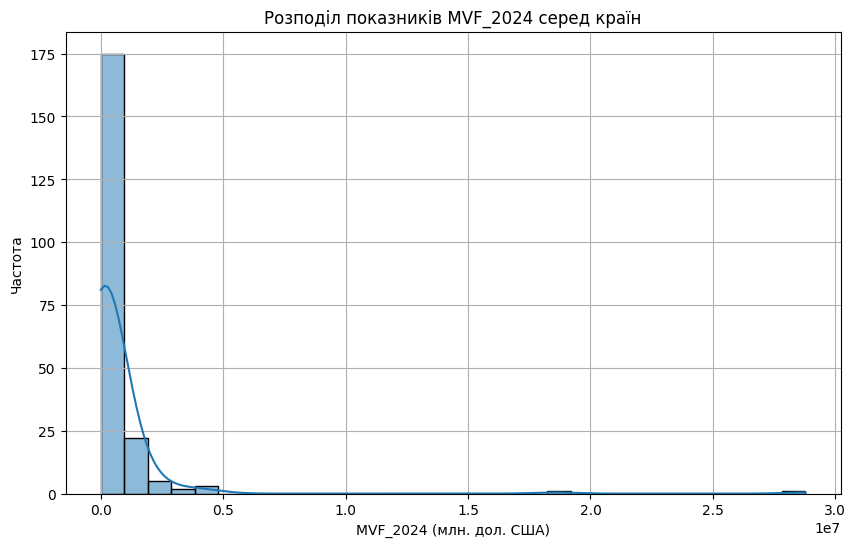

In [68]:
#Побудуйте гістограму для розподілу показників MVF_2024 серед всіх країн. Який вигляд має розподіл? Чи є країни, що виділяються?
import matplotlib.pyplot as plt
import seaborn as sns

df = df[~df['Country'].str.contains("World|European Union|Other", na=False)]
df['MVF_2024'] = pd.to_numeric(df['MVF_2024'], errors='coerce')
df = df.dropna(subset=['MVF_2024'])
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['MVF_2024'], bins=30, kde=True)
plt.title('Розподіл показників MVF_2024 серед країн')
plt.xlabel('MVF_2024 (млн. дол. США)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

In [69]:
#Розрахуйте частку кожної країни в загальному значенні для кожного року (MVF_2024, WorldBank_2023, OON_2022). Як змінюються частки країн з часом (дати відповідь)?
df = df[~df['Country'].str.contains("World|European Union|Other", na=False)]
df['MVF_2024'] = pd.to_numeric(df['MVF_2024'], errors='coerce')
df['WorldBank_2023'] = pd.to_numeric(df['WorldBank_2023'], errors='coerce')
df['OON_2022'] = pd.to_numeric(df['OON_2022'], errors='coerce')
df = df.dropna(subset=['MVF_2024', 'WorldBank_2023', 'OON_2022'])

total_mvf_2024 = df['MVF_2024'].sum()
total_worldbank_2023 = df['WorldBank_2023'].sum()
total_oon_2022 = df['OON_2022'].sum()

df['Share_MVF_2024'] = df['MVF_2024'] / total_mvf_2024
df['Share_WorldBank_2023'] = df['WorldBank_2023'] / total_worldbank_2023
df['Share_OON_2022'] = df['OON_2022'] / total_oon_2022

print("Частки для MVF_2024:")
print(df[['Country', 'Share_MVF_2024']].sort_values(by='Share_MVF_2024', ascending=False).head())

print("\nЧастки для WorldBank_2023:")
print(df[['Country', 'Share_WorldBank_2023']].sort_values(by='Share_WorldBank_2023', ascending=False).head())

print("\nЧастки для OON_2022:")
print(df[['Country', 'Share_OON_2022']].sort_values(by='Share_OON_2022', ascending=False).head())

print("\nКраїни з найвищими частками у кожному році:")
print(f"MVF_2024: {df.loc[df['Share_MVF_2024'].idxmax()]['Country']}")
print(f"WorldBank_2023: {df.loc[df['Share_WorldBank_2023'].idxmax()]['Country']}")
print(f"OON_2022: {df.loc[df['Share_OON_2022'].idxmax()]['Country']}")

print("\nКраїни з найнижчими частками у кожному році:")
print(f"MVF_2024: {df.loc[df['Share_MVF_2024'].idxmin()]['Country']}")
print(f"WorldBank_2023: {df.loc[df['Share_WorldBank_2023'].idxmin()]['Country']}")
print(f"OON_2022: {df.loc[df['Share_OON_2022'].idxmin()]['Country']}")

Частки для MVF_2024:
         Country  Share_MVF_2024
1  United States        0.227791
2          China        0.146679
3        Germany        0.036337
4          Japan        0.032533
5          India        0.031160

Частки для WorldBank_2023:
         Country  Share_WorldBank_2023
1  United States              0.243473
2          China              0.158348
3        Germany              0.039653
4          Japan              0.037489
5          India              0.031589

Частки для OON_2022:
         Country  Share_OON_2022
1  United States        0.254812
2          China        0.177797
4          Japan        0.041889
3        Germany        0.040353
5          India        0.034301

Країни з найвищими частками у кожному році:
MVF_2024: United States
WorldBank_2023: United States
OON_2022: United States

Країни з найнижчими частками у кожному році:
MVF_2024: Tuvalu
WorldBank_2023: Tuvalu
OON_2022: Tuvalu


<ipython-input-70-3d157c3d318c>:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


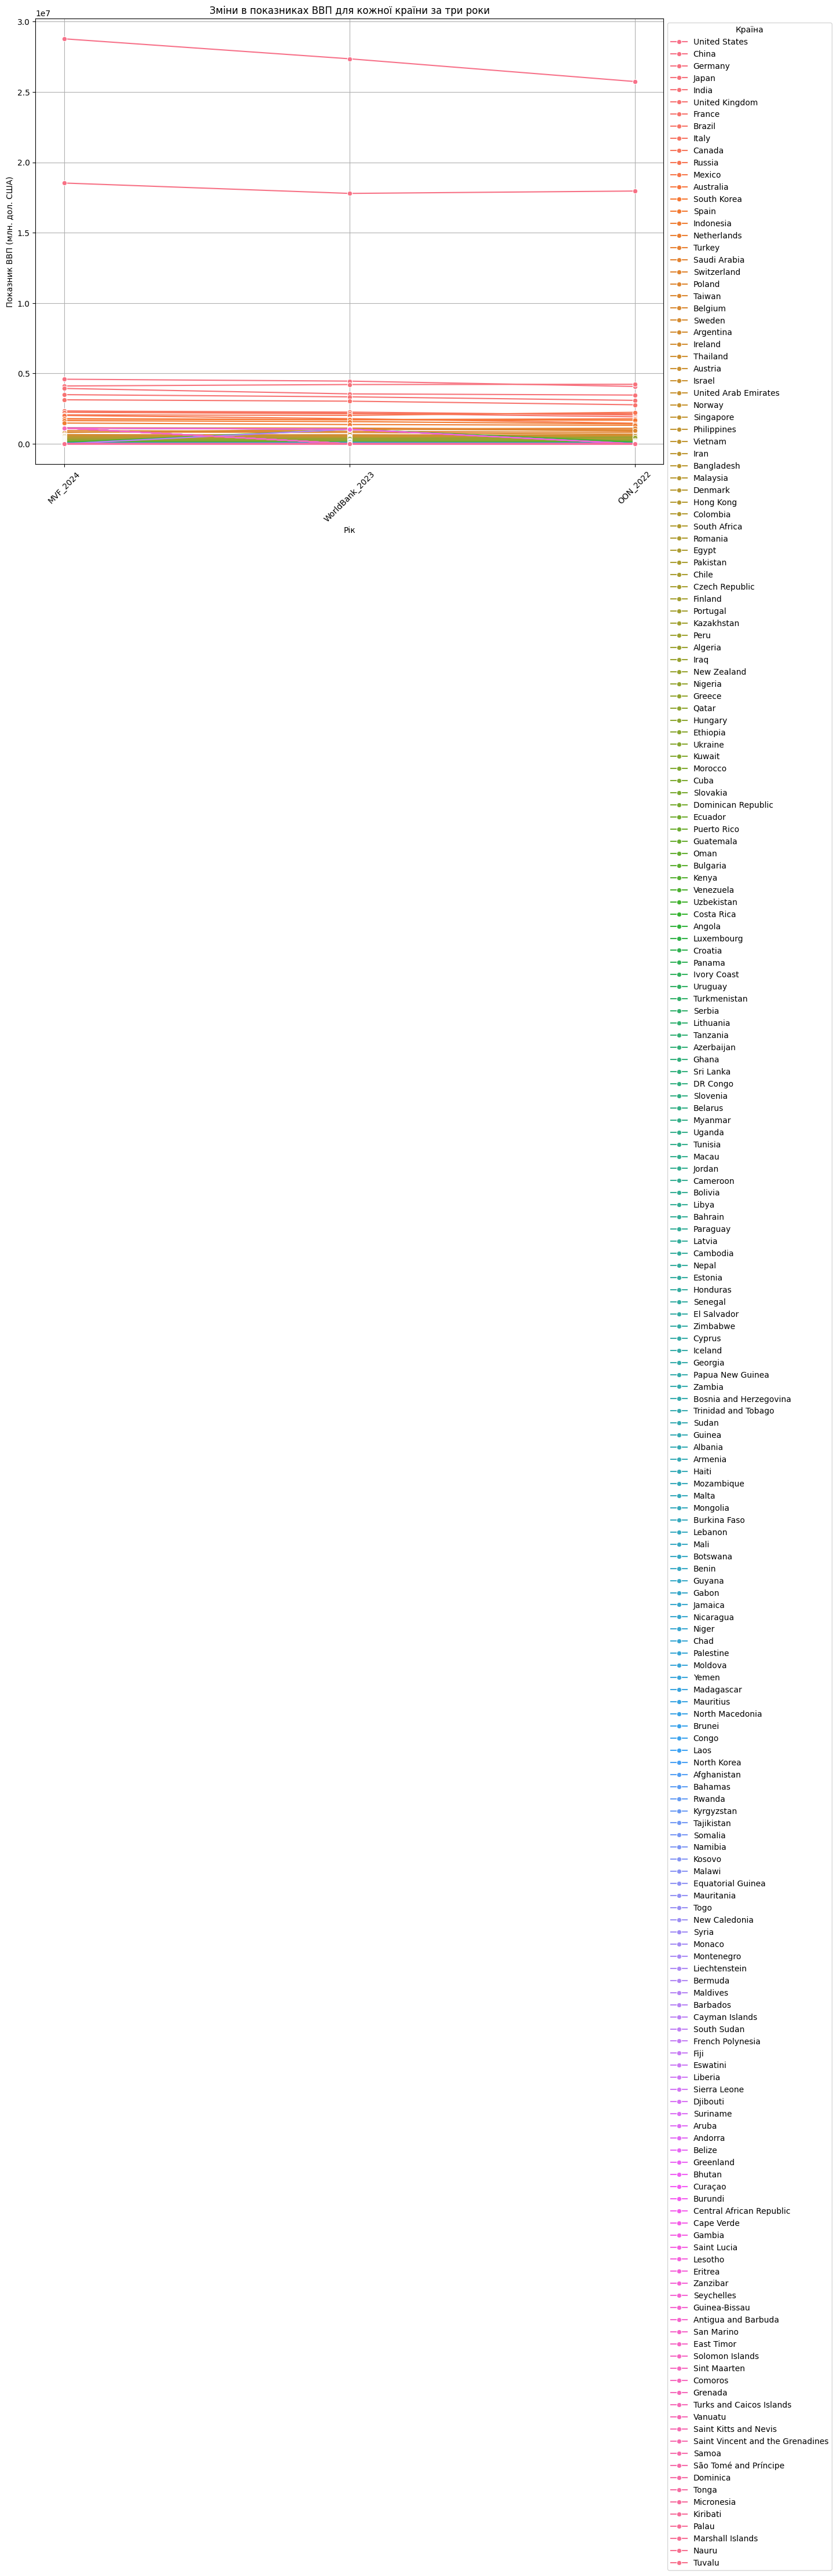

In [70]:
#Візуалізуйте зміни в показниках для кожної країни за три роки на графіку. Які країни показують стабільне зростання або спад (дати відповідь)?
import matplotlib.pyplot as plt
import seaborn as sns

df = df[~df['Country'].str.contains("World|European Union|Other", na=False)]
df['MVF_2024'] = pd.to_numeric(df['MVF_2024'], errors='coerce')
df['WorldBank_2023'] = pd.to_numeric(df['WorldBank_2023'], errors='coerce')
df['OON_2022'] = pd.to_numeric(df['OON_2022'], errors='coerce')
df = df.dropna(subset=['MVF_2024', 'WorldBank_2023', 'OON_2022'])
df_melted = df.melt(id_vars='Country', value_vars=['MVF_2024', 'WorldBank_2023', 'OON_2022'], var_name='Year', value_name='GDP')

plt.figure(figsize=(14, 10))
sns.lineplot(data=df_melted, x='Year', y='GDP', hue='Country', marker='o')
plt.title('Зміни в показниках ВВП для кожної країни за три роки')
plt.xlabel('Рік')
plt.ylabel('Показник ВВП (млн. дол. США)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Країна')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Висновок: на цій лабораторній роботі я проаналізувала економічні показники ВВП країн за три роки, розрахувала частки та тренди, і візуалізувала зміни для виявлення країн зі стабільним зростанням або спадом.
#Посилання на гітхаб: https://github.com/nastiadzen/Machine-learning